In [1]:
%matplotlib inline


# Grid Data!

If you don't have Monte Carlo chains, and have grid evaluations instead, that's fine too!

Just flatten your grid, set the weights to the grid evaluation, and set the grid flag. Here is
a nice diamond that you get from modifying a simple multivariate normal distribution.

Note that by default, grid data is not smoothed, though you can explicitly set the smooth
parameter in ``configure_general`` if you do want smoothing.

Note that you *cannot* use dictionary input with the grid method and not specify the full
flattened array. This is because we cannot construct the meshgrid from a dictionary, as
the order of the parameters is not preserved in the dictionary.


INFO:chainconsumer:Constructing meshgrid for grid results


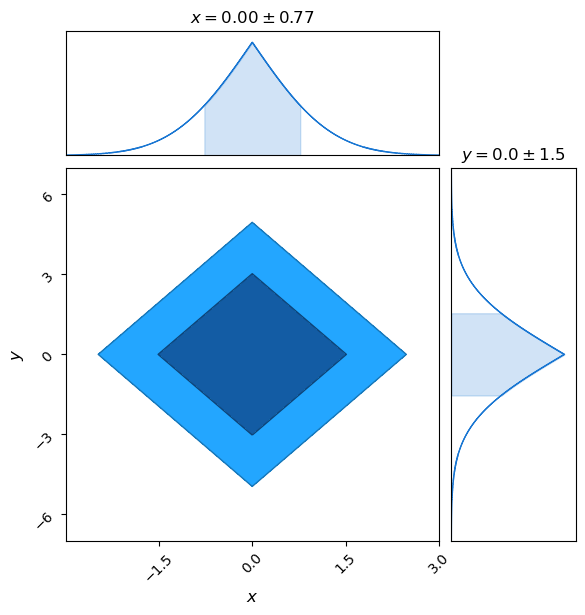

In [11]:
import numpy as np
from chainconsumer import ChainConsumer
from scipy.stats import multivariate_normal


x, y = np.linspace(-3, 3, 1001), np.linspace(-7, 7, 1001)
xx, yy = np.meshgrid(x, y, indexing='ij')
pdf = np.exp(-0.5 * (xx * xx + yy * yy / 4 + np.abs(xx * yy)))

c = ChainConsumer()
c.add_chain([x, y], parameters=["$x$", "$y$"], weights=pdf, grid=True)
fig = c.plotter.plot()
fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

In [13]:
print(pdf.shape)

(1001, 1001)


If you have the flattened array already, you can also pass this



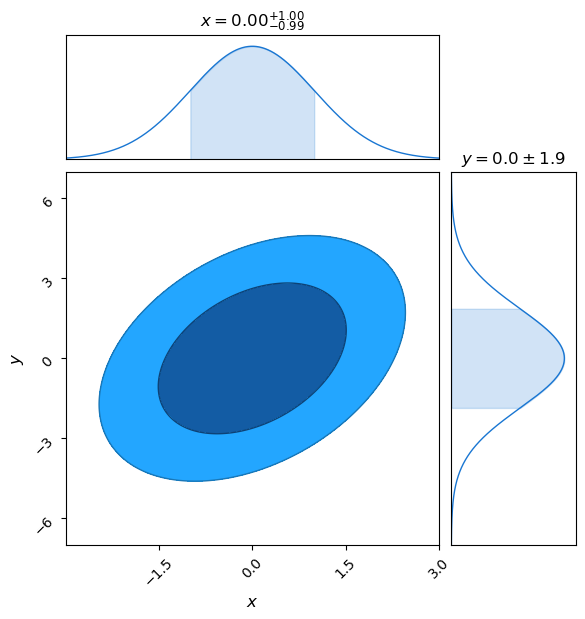

In [12]:
# Turning 2D data to flat data.
xs, ys = xx.flatten(), yy.flatten()
coords = np.vstack((xs, ys)).T
pdf_flat = multivariate_normal.pdf(coords, mean=[0.0, 0.0], cov=[[1.0, 0.7], [0.7, 3.5]])
c = ChainConsumer()
c.add_chain([xs, ys], parameters=["$x$", "$y$"], weights=pdf_flat, grid=True)
c.configure(smooth=1)  # Notice how smoothing changes the results!
fig = c.plotter.plot()

fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

In [7]:
print(xs.shape)
print(ys.shape)

(5000,)
(5000,)
